In [30]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage , dendrogram
from sklearn.decomposition import PCA , KernelPCA
from sklearn.metrics import silhouette_score
from pca import pca
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv('milk.csv', index_col=0)
df.head()

water  protein  fat  lactose   ash
Animal                                       
HORSE       90.1      2.6  1.0      6.9  0.35
ORANGUTAN   88.5      1.4  3.5      6.0  0.24
MONKEY      88.4      2.2  2.7      6.4  0.18
DONKEY      90.3      1.7  1.4      6.2  0.40
HIPPO       90.4      0.6  4.5      4.4  0.10

In [102]:
scaler = StandardScaler().set_output(transform='pandas')
scaled_data = scaler.fit_transform(df)

In [104]:
km = KMeans(n_clusters=4)
km.fit(scaled_data)
#km.labels_
km.inertia_

C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


18.493970123821068

In [114]:
Ks = np.arange(2,25)
wss = []
for i in Ks:
    km = KMeans(n_clusters=i, random_state=24)
    km.fit(scaled_data)
    #print(i, km.inertia_)
    wss.append(km.inertia_)

wss

C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packag

[49.854659507364545,
 31.488522427267302,
 18.493970123821068,
 14.109121029284545,
 11.15538638453631,
 8.293483441371313,
 6.4821634282025915,
 5.2924122973425884,
 3.693504511122214,
 2.8322257978028373,
 2.3741441662658858,
 1.7630631556041654,
 1.5759365939489773,
 1.2577380230642905,
 0.9479499075285727,
 0.6358326102521856,
 0.41619301987512825,
 0.32557225644367616,
 0.26044447299548007,
 0.1832794617250486,
 0.11856796629424778,
 0.05834628176137621,
 0.010596318171281056]

Text(0.5, 1.0, 'Scree Plot')

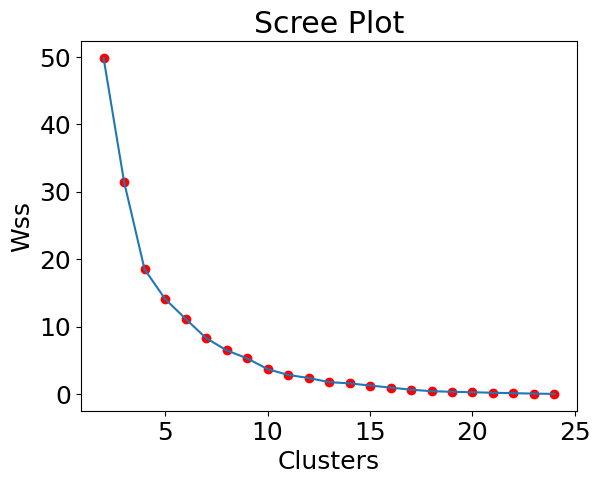

In [116]:
plt.scatter(Ks, wss, c='red')
plt.plot(Ks, wss)
plt.xlabel('Clusters')
plt.ylabel('Wss')
plt.title('Scree Plot')

### Elbow is observed at 4 hence 4 can be best number of clusters

In [110]:
print(silhouette_score(scaled_data, km.labels_))

0.06597333912570129


In [40]:
n = [2,3,4,5,6,7,8]
scores = []
for i in n:
    km = KMeans(n_clusters=i, random_state=24)
    km.fit(scaled_data)
    scores.append([i,silhouette_score(scaled_data, km.labels_)])
    
scores 

C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packag

[[2, 0.5258508931703421],
 [3, 0.48757649189546187],
 [4, 0.44348050284244644],
 [5, 0.39423075374986555],
 [6, 0.39485258676786045],
 [7, 0.3720658628104658],
 [8, 0.37602644048157396]]

In [96]:
model = pca()
results = model.fit_transform(scaled_data, col_labels=df.columns, row_labels=list(df.index))

[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


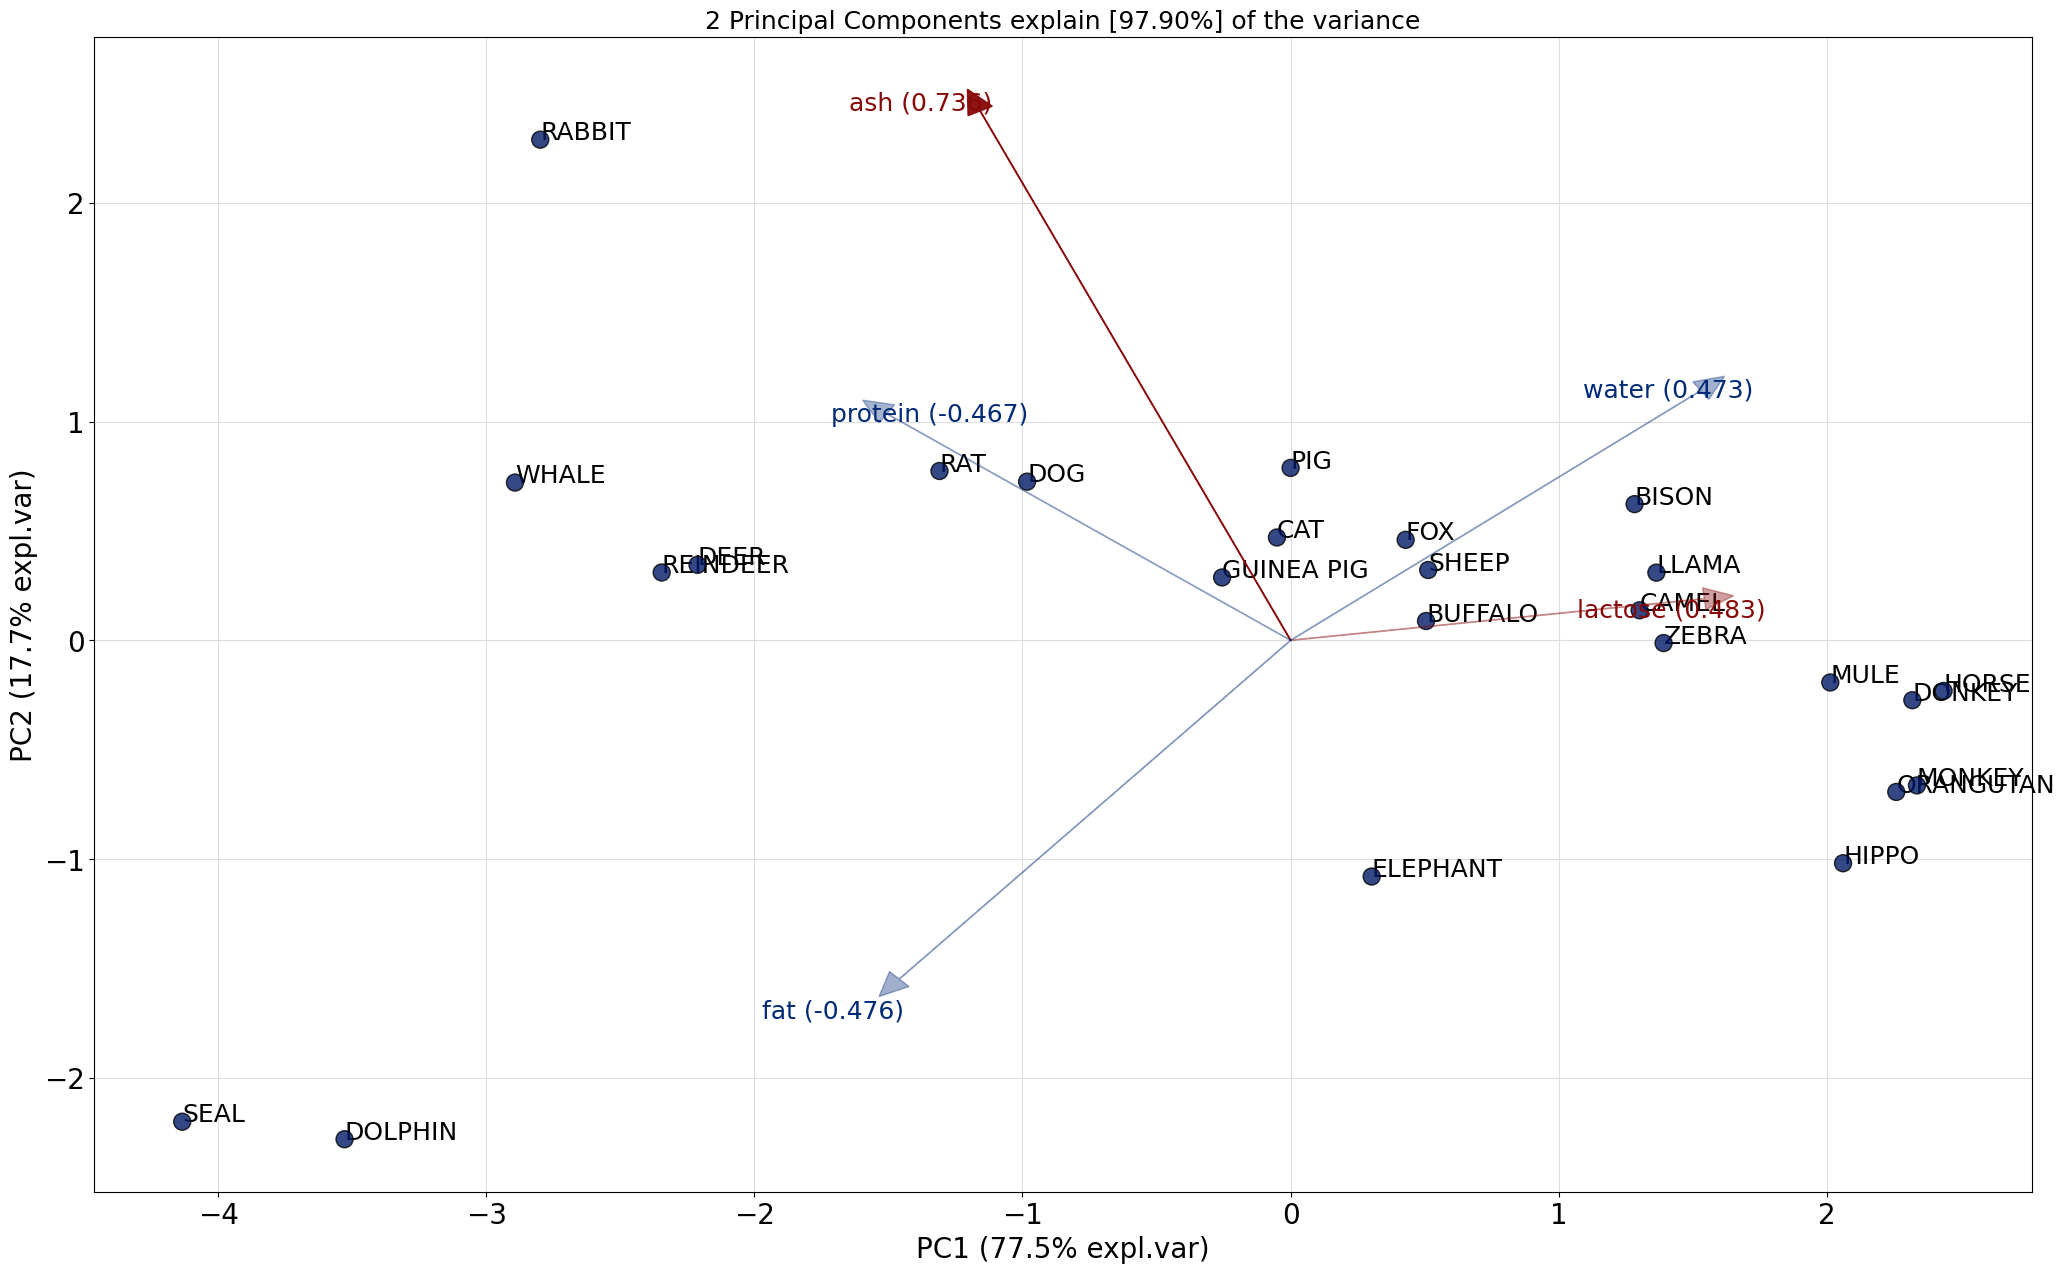

In [98]:
from sklearn.decomposition import PCA
import numpy as np
prcomp = PCA().set_output(transform='pandas')
components = prcomp.fit_transform(scaled_data)
model.biplot(label=True, legend=True)
for i in np.arange(0, df.shape[0]):
    plt.text(components.values[i,0], components.values[i,1], list(df.index)[i])

## Nutrient Dataset

In [43]:
nur = pd.read_csv('Nutrient.csv', index_col=0)
nur

energy  protein  fat  calcium  iron
Food_Item                                               
BEEF BRAISED            340       20   28        9   2.6
HAMBURGER               245       21   17        9   2.7
BEEF ROAST              420       15   39        7   2.0
BEEF STEAK              375       19   32        9   2.6
BEEF CANNED             180       22   10       17   3.7
CHICKEN BROILED         115       20    3        8   1.4
CHICKEN CANNED          170       25    7       12   1.5
BEEF HEART              160       26    5       14   5.9
LAMB LEG ROAST          265       20   20        9   2.6
LAMB SHOULDER ROAST     300       18   25        9   2.3
SMOKED HAM              340       20   28        9   2.5
PORK ROAST              340       19   29        9   2.5
PORK SIMMERED           355       19   30        9   2.4
BEEF TONGUE             205       18   14        7   2.5
VEAL CUTLET             185       23    9        9   2.7
BLUEFISH BAKED          135       22    4       25   0.6
CLAMS RAW                70       11    1       82   6.0
CLAMS CANNED             45        7    1       74   5.4
CRABMEAT CANNED          90       14    2       38   0.8
HADDOCK FRIED           135       16    5       15   0.5
MACKEREL BROILED        200       19   13        5   1.0
MACKEREL CANNED         155       16    9      157   1.8
PERCH FRIED             195       16   11       14   1.3
SALMON CANNED           120       17    5      159   0.7
SARDINES CANNED         180       22    9      367   2.5
TUNA CANNED             170       25    7        7   1.2
SHRIMP CANNED           110       23    1       98   2.6

In [45]:
nur_scl = scaler.fit_transform(nur)

In [47]:
n = [2,3,4,5,6,7,8]
scores = []
for i in n:
    km = KMeans(n_clusters=i, random_state=24)
    km.fit(nur_scl)
    scores.append([i ,silhouette_score(nur_scl,km.labels_)])

scores

C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packag

[[2, 0.44834235285877894],
 [3, 0.366716680623825],
 [4, 0.38729634844267813],
 [5, 0.3906769598972201],
 [6, 0.3697503613650477],
 [7, 0.35973992879422867],
 [8, 0.38572451941846536]]

-----------

## Recency Frequency Dataset

In [51]:
df = pd.read_csv('rfm_data_customer.csv', index_col=0)
df.head()

revenue most_recent_visit  number_of_orders  recency_days
customer_id                                                           
22086            777        2006-05-14                 9           232
2290            1555        2006-09-08                16           115
26377            336        2006-11-19                 5            43
24650           1189        2006-10-29                12            64
12883           1229        2006-12-09                12            23

In [53]:
df.drop('most_recent_visit', axis=1, inplace=True)

In [55]:
df_scl = scaler.fit_transform(df)

In [57]:
scores = []
for i in range(2,7):
    kmeans = KMeans(n_clusters=i, random_state=24)
    kmeans.fit(df_scl)
    scores.append([i, silhouette_score(df_scl, kmeans.labels_)])

In [58]:
scores

[[2, 0.3619175885782477],
 [3, 0.37102897041720206],
 [4, 0.3229983236688364],
 [5, 0.3249751004529168],
 [6, 0.288058231818753]]

#### Cluster analysis for best no of clusters

In [60]:
kmeans = KMeans(n_clusters=3, random_state=24)
kmeans.fit(df_scl)

KMeans(n_clusters=3, random_state=24)

In [61]:
kmeans.labels_

array([1, 0, 1, ..., 1, 1, 0])

In [62]:
df_clust = df.copy()
df_clust['Clust'] = kmeans.labels_
df_clust['Clust'] = df_clust['Clust'].astype(str)

In [63]:
#Centroids
df_clust.groupby('Clust').mean()

revenue  number_of_orders  recency_days
Clust                                             
0      1281.119459         12.909267    133.255123
1       749.292247          8.227773    136.139784
2       692.414498          7.351090    416.697185

## Nutrients with Inertia

In [123]:
Ks = np.arange(2,25)
wss = []
scores = []
for i in Ks:
    km = KMeans(n_clusters=i, random_state=24)
    km.fit(nur_scl)
    #print(i, km.inertia_)
    wss.append(km.inertia_)
    scores.append([i, silhouette_score(nur_scl, km.labels_)])

wss

C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dbda.STUDENTSDC\AppData\Local\anaconda3\Lib\site-packag

[102.91825197225208,
 65.8975252556916,
 46.868842989703374,
 30.4066622047884,
 23.13888202982235,
 18.292305163630232,
 14.451516418872515,
 11.753983054227508,
 8.910734361980218,
 6.9880414697430275,
 6.403792959351219,
 4.865837974975772,
 3.0460821416797765,
 2.5193696416465183,
 2.068435064537077,
 1.7634769078148766,
 1.4439491925249444,
 1.1225381038195272,
 0.8398404057949057,
 0.3829723701293939,
 0.22524329281351518,
 0.13693493957365246,
 0.04438143464761166]

Text(0.5, 1.0, 'Scree Plot')

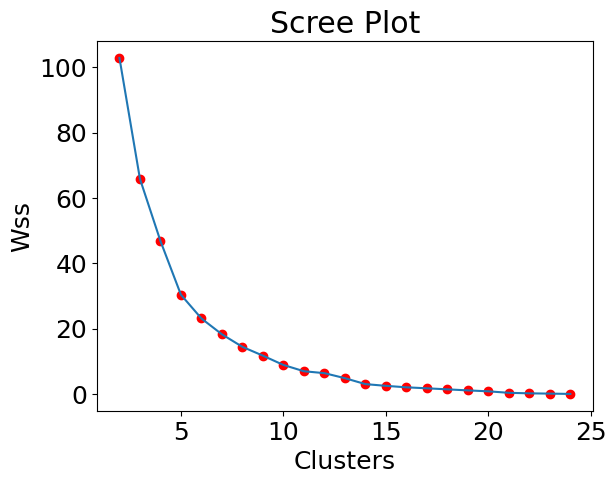

In [121]:
plt.scatter(Ks, wss, c='red')
plt.plot(Ks, wss)
plt.xlabel('Clusters')
plt.ylabel('Wss')
plt.title('Scree Plot')

### Elbow is observed at 5 hence 5 can be best number of clusters

In [125]:
scores

[[2, 0.44834235285877894],
 [3, 0.366716680623825],
 [4, 0.38729634844267813],
 [5, 0.3906769598972201],
 [6, 0.3697503613650477],
 [7, 0.35973992879422867],
 [8, 0.38572451941846536],
 [9, 0.35156446571680733],
 [10, 0.36382403585002393],
 [11, 0.37765100202229246],
 [12, 0.32422583773184643],
 [13, 0.35119139636328],
 [14, 0.38617611908057325],
 [15, 0.3723410836073207],
 [16, 0.33450144037439855],
 [17, 0.3081369919607909],
 [18, 0.2835017164487679],
 [19, 0.25943671252054146],
 [20, 0.2310706179482079],
 [21, 0.19720579871771143],
 [22, 0.1712460364282666],
 [23, 0.13492494322089993],
 [24, 0.13896582346773095]]